The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data.

You can achieve this by forcing each algorithm to be evaluated on a consistent test harness.

In the example below 6 different algorithms are compared:

1. Logistic Regression
2. Linear Discriminant Analysis
3. K-Nearest Neighbors
4. Classification and Regression Trees
5. Naive Bayes
6. Support Vector Machines

The problem is a standard binary classification dataset called the Pima Indians onset of diabetes problem. The problem has two classes and eight numeric input variables of varying scales.

In [16]:
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import warnings
warnings.simplefilter('ignore')

In [21]:
# load dataset
dataset = "pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(dataset, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

In [22]:
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

Here we appended all the models in a list so that we get easy access to each one of them in one place.

In [23]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.768233 (0.053820)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.699111 (0.061618)
NB: 0.755178 (0.042766)
SVM: 0.760424 (0.052931)


Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample.

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

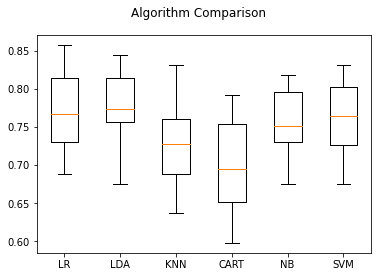

In [24]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

here we plotted boc plots for scores for each models